In [4]:
from functools import lru_cache
import pandas as pd
import matplotlib.pyplot as plt

@lru_cache(maxsize=None)  
def fetch_data_from_source(file):
    '''
    Files:
        f1sim-data-2022.parquet
        f1sim-data-2023.parquet
        
        f1sim-data-dictionary.xlsx
        
        f1sim-ref-left.csv
        f1sim-ref-line.csv
        f1sim-ref-right.csv
        f1sim-ref-turns.csv
    '''
    if file.split(".")[1] == "parquet":
        df = pd.read_parquet(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}")
    elif file.split(".")[1] == "csv":
        df = pd.read_csv(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}")
    elif file.split(".")[1] == "xlsx":
        df = pd.read_excel(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{file}") 
    return df

In [5]:
left = fetch_data_from_source('f1sim-ref-left.csv')
right = fetch_data_from_source('f1sim-ref-right.csv')
line = fetch_data_from_source('f1sim-ref-line.csv')
turns = fetch_data_from_source('f1sim-ref-turns.csv')

In [6]:
df_2022 = fetch_data_from_source('f1sim-data-2022.parquet')
df_2023 = fetch_data_from_source('f1sim-data-2023.parquet')
df = pd.concat([df_2022, df_2023])

In [8]:
right

,REFTYPE,SESSION_IDENTIFIER,FRAME,WORLDPOSX,WORLDPOSY,WORLDPOSZ
0,RIGHT,14023301428294605882,4227,-239.720749,225.080017,3.699864
1,RIGHT,14023301428294605882,4228,-240.664352,225.869324,3.695900
2,RIGHT,14023301428294605882,4229,-241.372360,226.461472,3.692851
3,RIGHT,14023301428294605882,4230,-242.081345,227.054626,3.690039
4,RIGHT,14023301428294605882,4231,-242.788864,227.646423,3.687490
...,...,...,...,...,...,...
5761,RIGHT,14023301428294605882,6601,80.157318,482.221100,3.221000
5762,RIGHT,14023301428294605882,6604,81.940964,480.457184,3.212195
5763,RIGHT,14023301428294605882,6619,87.858017,474.614563,3.162524
5764,RIGHT,14023301428294605882,6622,89.045319,473.444550,3.152795


In [9]:
left

,REFTYPE,SESSION_IDENTIFIER,FRAME,WORLDPOSX,WORLDPOSY,WORLDPOSZ
0,LEFT,18118509207215334066,2710,425.351593,-794.228149,3.507233
1,LEFT,18118509207215334066,3248,15.772991,-800.342407,3.837770
2,LEFT,18118509207215334066,3249,14.595509,-799.717712,3.836487
3,LEFT,18118509207215334066,3266,1.297104,-791.847290,3.815994
4,LEFT,18118509207215334066,3269,-0.410944,-790.732727,3.810157
...,...,...,...,...,...,...
5411,LEFT,18118509207215334066,868,119.261444,464.343323,3.004176
5412,LEFT,18118509207215334066,870,121.621696,462.068420,2.980060
5413,LEFT,18118509207215334066,877,129.510834,454.443726,2.937087
5414,LEFT,18118509207215334066,879,132.276596,451.760345,2.917126


In [15]:
turns

,TURN,APEX_X1,APEX_Y1,CORNER_X1,CORNER_Y1,CORNER_X2,CORNER_Y2
0,1,375.570000,191.519000,315,145,405,260
1,2,368.930000,90.000000,350,0,402,145
2,3,727.500000,-393.438930,702,-443,750,-295
3,4,601.000000,-455.000000,565,-535,645,-400
4,5,599.030370,-643.970000,535,-725,640,-580
5,6,235.931194,-862.330000,200,-912,290,-812
6,7,159.135352,-832.110000,105,-882,199,-782
7,8,-65.000000,-710.000000,-115,-810,-15,-600
8,9,-271.023529,232.624700,-325,182,-220,282
9,10,-390.782540,231.142360,-430,181,-330,281


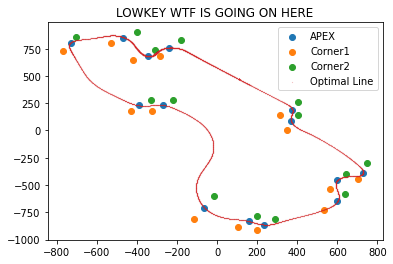

In [40]:
plt.scatter(turns["APEX_X1"], turns["APEX_Y1"], label = "APEX")
plt.scatter(turns["CORNER_X1"], turns["CORNER_Y1"], label = "Corner1")
plt.scatter(turns["CORNER_X2"], turns["CORNER_Y2"], label = "Corner2")
plt.scatter(line["WORLDPOSX"], line["WORLDPOSY"], s = 0.01, label = "Optimal Line")

plt.title("LOWKEY WTF IS GOING ON HERE")
plt.legend()
plt.show()

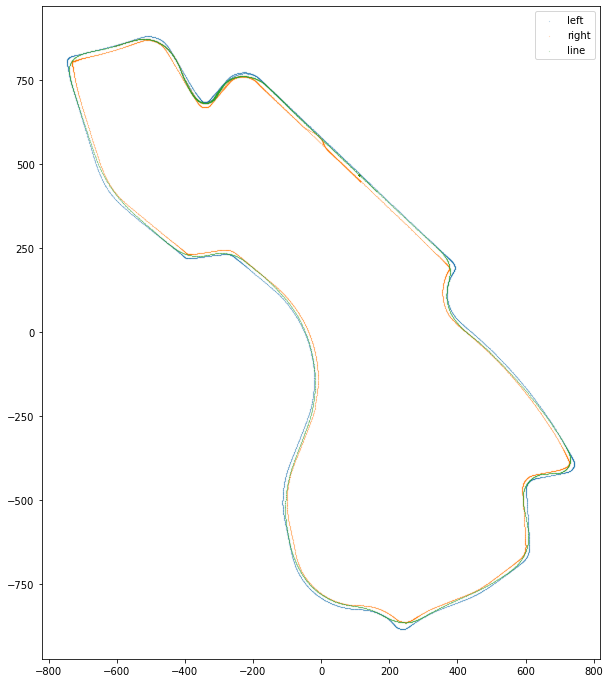

In [37]:
plt.figure(figsize=(10, 12))  # Width: 8 inches, Height: 6 inches

plt.scatter(left["WORLDPOSX"], left["WORLDPOSY"], s = 0.01, label = "left")
plt.scatter(right["WORLDPOSX"], right["WORLDPOSY"], s = 0.01, label = "right")
plt.scatter(line["WORLDPOSX"], line["WORLDPOSY"], s = 0.01, label = "line")
plt.legend()
plt.show()

In [24]:
line

,REFTYPE,SESSION_IDENTIFIER,FRAME,WORLDPOSX,WORLDPOSY,WORLDPOSZ
0,REF,9548584355158756459,298,-361.854462,689.007019,3.078216
1,REF,9548584355158756459,299,-361.408997,688.700745,3.073274
2,REF,9548584355158756459,305,-358.985138,687.214172,3.042558
3,REF,9548584355158756459,311,-355.946106,685.682190,2.998416
4,REF,9548584355158756459,1795,647.924072,-234.986954,2.930306
...,...,...,...,...,...,...
5211,REF,9548584355158756459,2555,492.747894,-750.884827,3.869313
5212,REF,9548584355158756459,2557,490.261810,-752.300049,3.855844
5213,REF,9548584355158756459,2560,488.116913,-753.505005,3.845103
5214,REF,9548584355158756459,2562,485.585388,-754.909851,3.835904


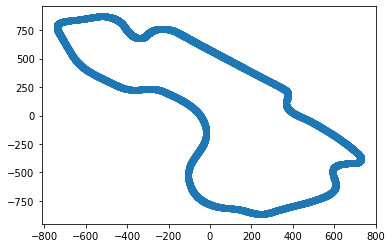

In [25]:
plt.scatter(line["WORLDPOSX"], line["WORLDPOSY"])

### An understanding of the data

- line: gives a referene line that they have calculated as the best algorithmically around the track. The line seems to be bounded in between the left and right at all times. 
- left and right: gives the boundaries of the track that they have created. However, the left and right track does not seem to be the Alfred Park track. (Although I might be wrong)?? WAIT NO IT IS THE ALFRED PARK JUST ROTATED AROUND. The top right is the part 1 and part 2 that we are investigating

- The APEX and corner 1 and 2 seems like the apex for left and right and the midpoint in between 



In [41]:
pd.set_option('display.max_columns', None)
df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,SPEED_KPH,THROTTLE,BRAKE,GEAR,ENGINE_RPM,STEERING,YAW,PITCH,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,315.0,1.000000,0.000000,8.0,10884.0,-0.014145,-2.312143,0.000380,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,314.0,0.350332,0.128359,8.0,10783.0,0.044816,-2.326019,-0.003212,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,278.0,0.000000,0.636988,8.0,9431.0,-0.008652,-2.343246,-0.003103,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,264.0,0.079118,0.818173,7.0,10505.0,-0.005997,-2.338133,-0.005251,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,165.0,0.786557,0.000000,4.0,10425.0,-0.199542,2.821733,0.004594,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134119,9.922656e+18,5433,2,2,5075.787109,99530,36499,22353,102385.0,43533.0,218.0,0.946700,0.000000,5.0,11547.0,0.013321,-2.338648,-0.004030,-0.029708,-32.176426,606.414673,3.035384,-23572.0,132.0,-22759.0,22752.0,973.0,-23559.0
1134120,9.922656e+18,5434,2,2,5078.836914,99580,36499,22353,102385.0,43533.0,219.0,0.953552,0.000000,5.0,11631.0,0.011490,-2.340864,-0.004268,-0.028951,-29.983286,604.296326,3.046007,-23522.0,139.0,-22811.0,22805.0,948.0,-23509.0
1134121,9.922656e+18,5435,2,2,5081.903320,99630,36499,22353,102385.0,43533.0,221.0,0.952499,0.000000,5.0,11715.0,0.010300,-2.342981,-0.003934,-0.029038,-27.781626,602.161499,3.057615,-23473.0,128.0,-22861.0,22854.0,951.0,-23461.0
1134122,9.922656e+18,5436,2,2,5084.995117,99680,36499,22353,102385.0,43533.0,222.0,0.954086,0.000000,5.0,11792.0,0.007095,-2.344869,-0.003498,-0.030296,-25.566910,600.005432,3.067509,-23430.0,114.0,-22905.0,22897.0,992.0,-23417.0


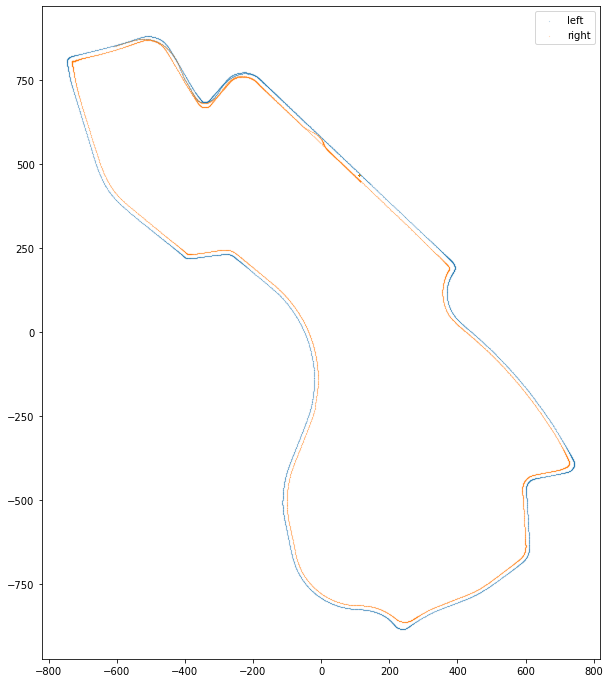

In [44]:
plt.figure(figsize=(10, 12))  # Width: 8 inches, Height: 6 inches

plt.scatter(left["WORLDPOSX"], left["WORLDPOSY"], s = 0.01, label = "left")
plt.scatter(right["WORLDPOSX"], right["WORLDPOSY"], s = 0.01, label = "right")
# plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"], s = 0.01, label = "each")


### SMOETIMES it seems like the WORLDPOSX and WORLDPOSY goes outside OF THE BOUNDS of the racetrack hmmm so they are disqualified...
plt.legend()
plt.show()

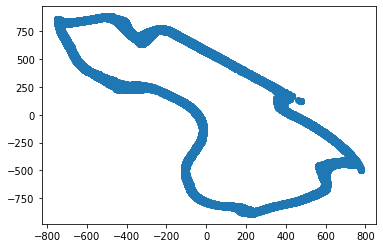

In [33]:
plt.scatter(df["WORLDPOSX"], df["WORLDPOSY"]) 

# LOL as you can see theres like points where theres a little smudge outside of the trail HAHAHAH that is because the ppl driving it drove over HAHAHAHAH

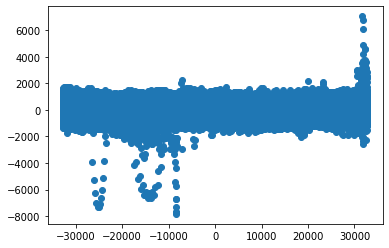

In [32]:
plt.scatter(df["WORLDFORWARDDIRX"], df["WORLDFORWARDDIRY"])